# Pattern recognition - MsCV ViBOT

Guillaume Lemaitre - Fabrice Meriaudeau - Joan Massich

In [2]:

%matplotlib inline
%pprint off

# Matplotlib file
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# MPLD3 extension
import mpld3

# Plotly extension
import plotly.plotly as py
from plotly.graph_objs import *
py.sign_in('glemaitre', 'se04g0bmi2')

# Numpy library
import numpy as np


Pretty printing has been turned OFF


## Features Extraction - Dimensionality reduction

### Principle Components Analysis (PCA) and Linear Discriminant Analysis (LDA)

In this section, we will deal with the data located in `./data/pca_lda_data.mat`.

In [86]:

# Import the module to import .mat file
from scipy.io import loadmat

# Read the data
data = loadmat('./data/pca_lda_data.mat')

# Extract the data
class_1 = np.asmatrix(data['class1'].T)
class_2 = np.asmatrix(data['class2'].T)
class_3 = np.asmatrix(data['class3'].T)

# Concatenate all the data into a single matrix
### Concatenate the class #1, class #2, class #3
data = np.concatenate((class_1,
                       class_2,
                       class_3),
                      axis = 0)

# Concatenate the ground-truth and make sure that the output is a vector
### Concatenate the ground-truth of the class #1, class #2, class #3
gt = np.ravel(np.concatenate((np.ones((np.shape(class_1)[0], 1)) * 1,
                              np.ones((np.shape(class_2)[0], 1)) * 2,
                              np.ones((np.shape(class_3)[0], 1)) * 3),
                             axis = 0))
print np.shape(class_2)

(5000, 3)


(a) Plot the data using plotly toolbox and the Scatter3d function. Check the following example: https://plot.ly/python/3d-scatter-plots/. Do not use `plot_url` in order to plot the figure in this notebook. Use the following properties:
    
* Use Marker() in order to modify the markers properties as color, size and symbol,
* Class #1 can be plotted in blue with circle of size 3,
* Class #2 can be plotted in red with diamond of size 3,
* Class #3 can be plotted in green with square of size 3.

In [4]:
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np

trace1 = go.Scatter3d(
    x=class_1[:,0],
    y=class_1[:,1],
    z=class_1[:,2],
    
    mode='markers', 
    marker=Marker(size=5, symbol='diamond', line=Line(color='rgba(255,0,0,1.0)', width=0.5), opacity=.8)
)

trace2 = go.Scatter3d(
    x=class_2[:,0],
    y=class_2[:,1],
    z=class_2[:,2],
    mode='markers', 
    marker=Marker(size=5, line=Line(color='rgba(0,0,255,1.0)', width=0.5), opacity=.8)
)

trace3 = go.Scatter3d(
    x=class_3[:,0],
    y=class_3[:,1],
    z=class_3[:,2],
    mode='markers', 
    marker=Marker(size=5, symbol='hexagon',line=Line(color='rgba(0,255,0,1.0)', width=0.5), opacity=.8)
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')


#### Implementation of PCA

Implement PCA by completing the following Python code in order to return the eigenvalues and eigenvectors. Your implementation should contain the small size trick in the case that it will be necessary. To do so, we will decompose the problem in several steps:

##### Mean invariance

(a) Complete the following function by:

* Computing the mean of the data for each feature dimension => Use np.mean() with the argument axis,
* Return the original data subtracted by its mean vector.

In [5]:
# Define a function to obtain mean invariance
def MeanInvariance(X):
    # Compute the mean vector
    ### Use the function np.mean() with the axis argument
    mean_data = np.mean(X, axis=0)

    # Subtract the mean vector and return the matrix
    return X - mean_data
    

##### PCA decomposition

(b) Complete the following function in order to obtain the eigenvalues and eigenvectors. This function neglecte the small size trick. To do so, you will need to:

* Compute the covariance matrix $C = XX^t$ and normalise $C$ by the number of feature dimensions.
* Compute the eigenvectors $V$ with its corresponding eigenvalues $\lambda$ => Use np.linalg.eig(),
* Transorm the eigenvalues and eigenvectors array to be considered as a 2-D array => Use np.atleast_2d(),
* Return the eigenvectors and eigenvalues.

In [7]:

# Define a function to obtain the eigen decomposition as in the original PCA
def NormalDecompositionPCA(X):
    # Compute the covariance matrix with the size trick
    C = X * np.transpose(X) / np.shape(X)[1]

    # Compute the eigenvalues and eigenvectors of C
    ### Use the function np.linalg.eig()
    w, v = np.linalg.eig(C)
    ### Use the function np.atleast_2d()
    w = np.atleast_2d(w)
    v = np.atleast_2d(v)
    
    return (w, v)


##### Small size trick decomposition

(c) Complete the following Python function, to implement the small size trick. To do so, you will need to:

* Transpose the data vector,
* Apply normal PCA,
* Change the eigenvectors $V'$ such that $V = XV'$,
* Return the eigenvectors and eigenvalues.

In [8]:
# Define a function to obtain the eigen decomposition as in the original PCA
def SmallSizeTrickDecompositionPCA(X):
        # Apply PCA by transposing the data
        X_ = np.transpose(X)
        w, v = NormalDecompositionPCA(X_)
        
        # Recompute the eigenvector for the original data
        v = X*v
        
        return (w, v)
    

##### Put it all together ...

(d) Complete the following all together to get the PCA.

In [21]:

# Implement PCA returning the eigenvectors and eigenvalues
### data should be N x L with N the number of samples and L the number of feature dimensions
def PCAPr(X):
    
    # NOTE: Transpose the data in order to obtain an LxN matrix as the PCA convention
    X = np.transpose(X)
    # Apply the mean invariance
    data_pca = MeanInvariance(X)
    
    # Check if we apply the small size trick or not
    ### Apply small trick
    if np.shape(X)[1] > np.shape(X)[0]:
        return NormalDecompositionPCA(X)
    ### Normal PCA
    else:
        return SmallSizeTrickDecompositionPCA(X)


##### Dimension reduction

The projection of the data to a lower space using the eigenvalues and eigenvectors is similiar for PCA and LDA. Thus, you will create a specific function in order to handle this projection.

(a) Complete the following function in order to project the data into a space with a lower dimensionality. To do so, you will have to:

* Sort the eigenvectors depending of the eigenvalues => Use np.argsort(),
* Return the projected data $X_r = X V_i$ where $V_i$ are the $i^{\text{th}}$ first eigenvectors.

In [65]:

# Decomposition using PCA
### data should be N x L with N the number of samples and L the number of feature dimensions
def ProjectionData(X, v, w, nb_component = 1):
    
    if nb_component > np.shape(X)[1]:
        raise NameError('The number of component cannot be higher than the inital number of dimensions of X. \
        We do dimensionality reduction here!!!!!')
    
    # Start by sorting the eigenvalues and eigenvectors based on the eigenvalues
    ### Find the sorting index using np.argsort()
    ### Use np.ravel to force to be a vector
    idx_sorted = np.ravel(np.argsort(w))
    
    # Re-order eigenvalues and eigenvector
    w = w[0][idx_sorted]
    v = v[:,idx_sorted]
    
    return X * v[:,0:nb_component]
    

##### Apply PCA and dimension reduction

(a) Apply PCA and the dimension reduction for each class, plot the distribution of each class.

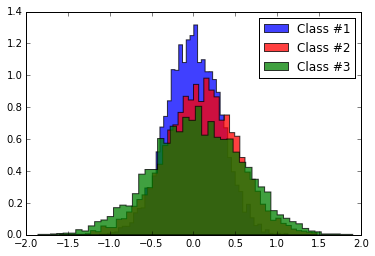

In [83]:
w, v = PCAPr(class_1)
class_1_p = ProjectionData(class_1, v, w)

w, v = PCAPr(class_2)
class_2_p = ProjectionData(class_2, v, w)

w, v = PCAPr(class_3)
class_3_p = ProjectionData(class_3, v, w)

nb_bins = 50
    
fig = plt.figure()
# Plot the PDF of the first class
n, bins, patches = plt.hist(class_1_p, nb_bins, normed=1, histtype='stepfilled', label='Class #1')
plt.setp(patches, 'facecolor', 'b', 'alpha', 0.75)
# Plot the PDF of the second class
n, bins, patches = plt.hist(class_2_p, nb_bins, normed=1, histtype='stepfilled', label='Class #2')
plt.setp(patches, 'facecolor', 'r', 'alpha', 0.75)
n, bins, patches = plt.hist(class_3_p, nb_bins, normed=1, histtype='stepfilled', label='Class #3')
plt.setp(patches, 'facecolor', 'g', 'alpha', 0.75)
plt.legend()
plt.show()

(b) Plot the distribution of the different once projected in the low dimensional space. Use the following function:

* `plt.hist` in order to plot the pdf of each class,
* `plt.setp` in order to change the color of the bins.

In [84]:
# Plot the different class
nb_bins = 50

fig = plt.figure()
# Distribution of the projection of the class #1 
n, bins, patches = plt.hist(class_1_p, nb_bins, normed=1, histtype='stepfilled', label='Class #1')
plt.setp(patches, 'facecolor', 'b', 'alpha', 0.75)
# Distribution of the projection of the class #2
n, bins, patches = plt.hist(class_2_p, nb_bins, normed=1, histtype='stepfilled', label='Class #2')
plt.setp(patches, 'facecolor', 'r', 'alpha', 0.75)
# Distribution of the projection of the class #3
n, bins, patches = plt.hist(class_3_p, nb_bins, normed=1, histtype='stepfilled', label='Class #3')
plt.setp(patches, 'facecolor', 'g', 'alpha', 0.75)
plt.legend(framealpha=0)

mpld3.display(fig)


#### Implementation of PCA in scikit-learn toolbox

As reference, we give an example of how to use PCA implemented in scikit-learn.

In [87]:

from sklearn.decomposition import PCA

pca_data = PCA(n_components = 1)
pca_data.fit(data)

class_1_pca = pca_data.transform(class_1)
class_2_pca = pca_data.transform(class_2)
class_3_pca = pca_data.transform(class_3)

# Plot the different class
nb_bins = 50

fig = plt.figure()
# Distribution of the projection of the class #1 
n, bins, patches = plt.hist(class_1_pca, nb_bins, normed=1, histtype='stepfilled', label='Class #1')
plt.setp(patches, 'facecolor', 'b', 'alpha', 0.75)
# Distribution of the projection of the class #1
n, bins, patches = plt.hist(class_2_pca, nb_bins, normed=1, histtype='stepfilled', label='Class #2')
plt.setp(patches, 'facecolor', 'r', 'alpha', 0.75)
# Distribution of the projection of the class #1
n, bins, patches = plt.hist(class_3_pca, nb_bins, normed=1, histtype='stepfilled', label='Class #3')
plt.setp(patches, 'facecolor', 'g', 'alpha', 0.75)
plt.legend(framealpha=0)

mpld3.display(fig)


#### Implementation of LDA

LDA differs from PCA since that it is taking into account the classes properties. Thus, we defined the following Python class `pr_class` which will be used in LDA. The class `pr_class` is characterized by the following attributes:

* `n_dims`: corresponds to the number of feature dimensions,
* `n_samples`: corresponds to the number of samples,
* `data`: a matrix with the entire data od size `n_samples` by `n_dims`,
* `gt`: a vector with the ground-truth labels,
* `mean_vec`: a vector with the mean of each feature dimension,
* `cov_matrix`: a matrix containing the covariance of `data`.
* `prior`: a scalar with the prior of the class.

In [88]:

# Define a class for all the information
class pr_class(object):     
    def __init__(self, X, y, prior):
        self.n_dims = np.shape(X)[1]
        self.n_samples = np.shape(X)[0]
        self.data = X
        self.gt = y
        self.mean_vec = np.mean(X, axis = 0)
        self.cov_mat = (self.data - self.mean_vec).T * (self.data - self.mean_vec) / (float(self.n_samples) - 1.)
        self.prior = prior
        

As for PCA, the implementation of LDA will be broken down in several steps.

##### Creation of a list of `pr_class` containing each class information

We first need to split the data by classes and compute the mean and covariance by calling the constructor of the class `pr_class`.

In [90]:

# Define a function to build a list (or vector) of pr_class
def BuildListClass(X, y, priors):
    # Find the number of classes
    nb_classes = np.size(np.unique(y))
    
    # Create an object for each class
    return [pr_class(X[np.ravel(np.nonzero(y == (np.unique(y)[count]))), :], \
                     y[np.ravel(np.nonzero(y == (np.unique(y)[count])))], \
                     priors[count]) for count in xrange(nb_classes)]


##### With-in class scatter matrix

(a) Complete the following code to compute the with-in class scatter matrix. Thus, make the sum of the covariance of each class normalized by their prior.

In [92]:

# Define a function to compute the with-in class scatter matrix
### X is the list of `pr_class`
def ComputeSw(X):
    Sw = 0.
    for c in range(0, np.size(X)):
        Sw += X[c].cov_mat
        Sw /= np.size(X)
    return Sw

##### Between classes scatter matrix

(b) Complete the following code to compute the between classes scatter matrix. To do so, you will need to:

* Concatenate all the data inside a matrix,
* Compute the sum of the covariances which are the differences between the mean of each class and the total mean.

In [93]:

# Define a function to compute the between classes scatter matrix
### X is the list of `pr_class`
def ComputeSb(X):
    # Concatenate all the data to get the mixture covariance
    all_data = np.squeeze([X[count].data for count in xrange(np.size(X))])
    all_data = np.concatenate([all_data[count] for count in xrange(np.shape(all_data)[0])], axis=0)
    return np.asmatrix(np.cov(np.transpose(all_data)))
    
    Sb = 0.
    for c in range(0, np.size(X)):
        Sb += np.mean(X[c]) - np.mean(all_data)
    
    return Sb

##### Put it all together ...

(a) Complete the following function to implement LDA. To do so,

* Construct a list of `pr_class`,
* Compute the scatter matrix $S$ such as $S = \frac{S_b}{S_w}$,
* Apply the eigen decomposition of $S$,
* Return the eigenvalues and eigenvectors.

In [97]:

# Definition of LDA
def LDAPr(X, y, priors):
   
    # Build the list of classes
    classes_pr = BuildListClass(X, y, priors)
    
    # Compute the matrix for subsequent decomposition
    S = ComputeSb(X) / ComputeSw(X)
    
    # Compute the eigenvalues and eigenvectors of C
    w, v = np.linalg.eig(S)
    #w = ...
    #v = ...
   
    return (w, v)

##### Apply LDA and dimension reduction

(a) Apply LDA and the dimension reduction for each class, plot the distribution of each class.

(b) Plot the distribution of the different once projected in the low dimensional space.

In [ ]:
...

#### Implementation of LDA in scikit-learn toolbox

As reference, we give an example of how to use LDA implemented in scikit-learn.

In [ ]:

# Import LDA from scikit-learn
from sklearn.lda import LDA

# Project using LDA
lda = LDA(n_components=1)
lda.fit(data, gt)

class_1_lda = lda.transform(class_1)
class_2_lda = lda.transform(class_2)
class_3_lda = lda.transform(class_3)

# Plot the different class
nb_bins = 50

fig = plt.figure()
# Distribution of the projection of the class #1 
n, bins, patches = plt.hist(class_1_lda, nb_bins, normed=1, histtype='stepfilled', label='Class #1')
plt.setp(patches, 'facecolor', 'b', 'alpha', 0.75)
# Distribution of the projection of the class #1
n, bins, patches = plt.hist(class_2_lda, nb_bins, normed=1, histtype='stepfilled', label='Class #2')
plt.setp(patches, 'facecolor', 'r', 'alpha', 0.75)
# Distribution of the projection of the class #1
n, bins, patches = plt.hist(class_3_lda, nb_bins, normed=1, histtype='stepfilled', label='Class #3')
plt.setp(patches, 'facecolor', 'g', 'alpha', 0.75)
plt.legend(framealpha=0)

mpld3.display(fig)


### To take away ...

(a) Explain in few lines the difference between PCA and LDA. 

(b) Explain the difference between features selection and features extraction.